# Udacity ML Coursework

In [1]:
%matplotlib inline

import bs4
import datetime
import glob
import ipywidgets
from itertools import product
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.ensemble
import sklearn.metrics
import sklearn.tree
import sklearn.svm
import time
import tensorflow as tf


from scipy import stats

## Global parameters and variables

In [2]:
tf.enable_eager_execution()
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('./data/udacity.csv')
print("Shape :", df.shape)
df.sample(5)

Shape : (96, 3)


,x1,x2,y
0,0.245390,0.81725,0
6,0.395160,0.48099,0
43,0.512670,0.47807,1
12,0.266130,0.75000,0
95,0.091014,0.20322,1


In [4]:
x = df.iloc[:, 0:2].to_numpy()
y = df.iloc[:, 2].to_numpy()

In [39]:
model = sklearn.ensemble.AdaBoostClassifier(n_estimators=20)
model.fit(x, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=20, random_state=None)

In [40]:
y_pred = model.predict(x)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = sklearn.metrics.accuracy_score(y, y_pred)
print("Accuracy : {:.2f}".format(acc*100))

Accuracy : 100.00


# Visualizing the Classifier

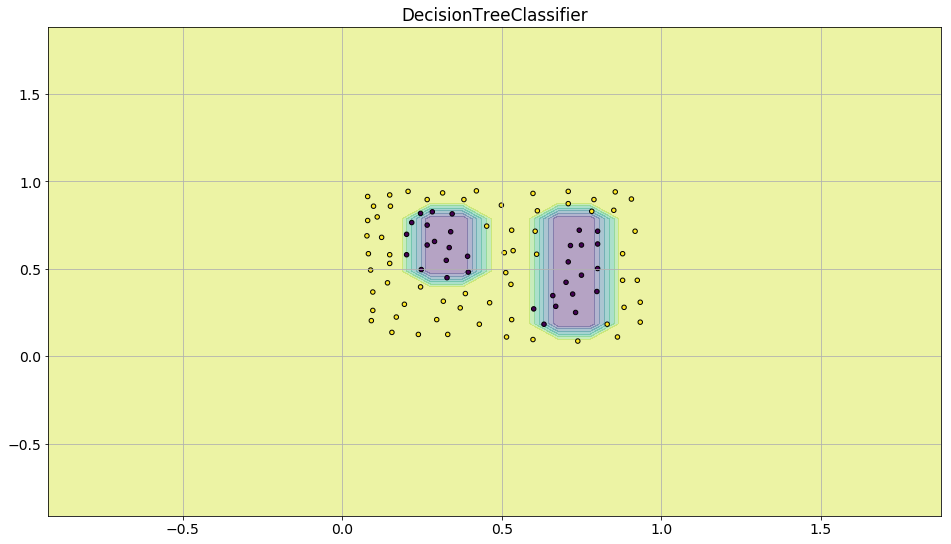

In [41]:
# Plotting decision regions

classifier = model
title = 'DecisionTreeClassifier'


x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
plt.title(title)

plt.show()